In [9]:
# mike babb
# 2024 06 28
# what streets start and stop?

In [10]:
# standard
import os

In [11]:
# external
import geopandas as gpd
import numpy as np
import pandas as pd
import seaborn as sns

In [12]:
# custom
from geodataio.geo_operations import points2distance, calculate_initial_compass_bearing
from utils import *

In [13]:
# file path
input_file_path = 'H:/project/seattle_streets/data/' 

In [14]:
file_name = 'missing_segments.gpkg'

In [15]:
fpn = os.path.join(input_file_path, file_name)

In [16]:
gdf = gpd.read_file(filename = fpn)

In [17]:
gdf['n_segments'] = int(1)

In [18]:
missing_dict = {0:'complete_street',
                1:'disconnected_street',
                2:'missing_street'}

In [19]:
gdf['street_status_desc'] = gdf['street_status'].map(missing_dict)

In [20]:
gdf.columns

Index(['snd_id', 'ord_street_name', 'ord_stname_concat', 'ord_street_type',
       'ord_street_type_rank', 'snd_group', 'street_status', 'sn_id', 'en_id',
       'dist', 'dist_miles', 'geometry', 'n_segments', 'street_status_desc'],
      dtype='object')

In [21]:
# galer

In [22]:
temp_gdf = gdf.loc[(gdf['ord_stname_concat'] == 'W GALER ST') &
(gdf['street_status'] == 1), :]

In [23]:
temp_gdf = temp_gdf.drop(labels = ['geometry'], axis = 1)

In [24]:
g = nx.from_pandas_edgelist(df = temp_gdf, source = 'sn_id', target = 'en_id', edge_attr=True)

In [25]:
for cc in nx.connected_components(G = g):
    # cc is the sub graph
    # this is the edge data
    #sub_graph = G.subgraph(c).copy() for c in nx.connected_components(G)]
    sub_graph = g.subgraph(cc).copy()
    print(sub_graph.nodes())

[10307, 10306, 10311, 10310, 10324, 10321, 10314, 10316, 10315, 10304, 10301, 10319, 10318, 10308, 10299, 10298, 10303, 10296, 10294, 47731, 10290, 10297]
[10292, 10284, 10351]
[10361, 10364, 10366]
[10272, 10273, 10275, 10276, 10277]
[10270, 10239]


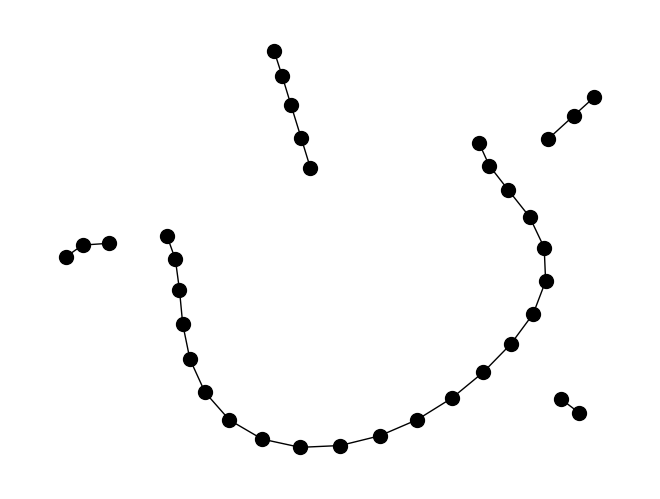

In [28]:
# this will change every time
nx.draw(g, node_size = 100, node_color = 'black')